In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



Found 1404 files belonging to 2 classes.
['Healthy', 'Parkinson']


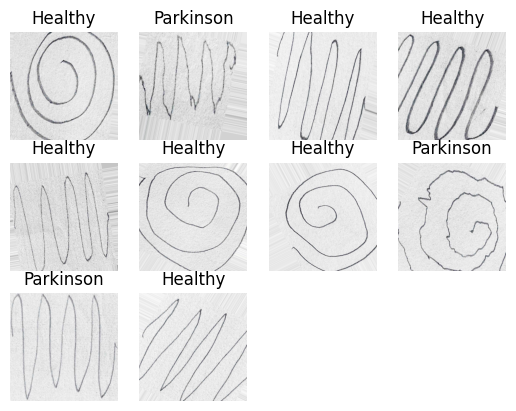

In [ ]:



dataset_path= '/content/drive/MyDrive/drawings'
dataset_Healthy = '/content/drive/MyDrive/drawings/Healthy'
dataset_Parkinson = '/content/drive/MyDrive/drawings/Parkinson'


raw_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    shuffle=True ,
    image_size=(256, 256),
    batch_size=32
)


class_names = raw_dataset.class_names
print(class_names)
for images, labels in raw_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#training/validation split


ds_train= tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                              validation_split=0.3 ,
                                                              subset="training" ,
                                                              shuffle=True,
                                                              seed=123,
                                                              image_size=(128,128),
                                                              batch_size=32)

ds_validation= tf.keras.preprocessing.image_dataset_from_directory(dataset_path,
                                                              validation_split=0.3 ,
                                                              subset="validation" ,
                                                              shuffle=True,
                                                              seed =123,
                                                              image_size=(128,128),
                                                              batch_size=32)

#Get class names
class_names = ds_train.class_names
print (class_names)



Found 1404 files belonging to 2 classes.
Using 983 files for training.
Found 1404 files belonging to 2 classes.
Using 421 files for validation.
['Healthy', 'Parkinson']


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained MobileNetV2
mobile_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# Freeze the base model (initially)
mobile_model.trainable = False

# Add custom layers
x = mobile_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build final model
transfer_model = Model(inputs=mobile_model.input, outputs=predictions)

transfer_model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = transfer_model.fit(
    ds_train,
    epochs=50,
    validation_data= ds_validation,
)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 36s 918ms/step - accuracy: 0.5165 - loss: 0.8397 - val_accuracy: 0.5344 - val_loss: 0.6877
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 850ms/step - accuracy: 0.4751 - loss: 0.8687 - val_accuracy: 0.5796 - val_loss: 0.6871
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 37s 712ms/step - accuracy: 0.5594 - loss: 0.7810 - val_accuracy: 0.5819 - val_loss: 0.6842
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 882ms/step - accuracy: 0.5201 - loss: 0.7819 - val_accuracy: 0.5796 - val_loss: 0.6829
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 41s 879ms/step - accuracy: 0.4724 - loss: 0.8229 - val_accuracy: 0.5914 - val_loss: 0.6799
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 40s 863ms/step - accuracy: 0.5216 - loss: 0.7922 - val_accuracy: 0.5891 - val_loss: 0.6782
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 38s 779ms/step - accuracy: 0.4594 - loss: 0.8384 - val_accuracy: 0.5891 - val_loss: 0.6763
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 865ms/step - accuracy: 0.5424 - loss: 0.7771 - 

In [ ]:
transfer_model.save('transfer_model.h5')

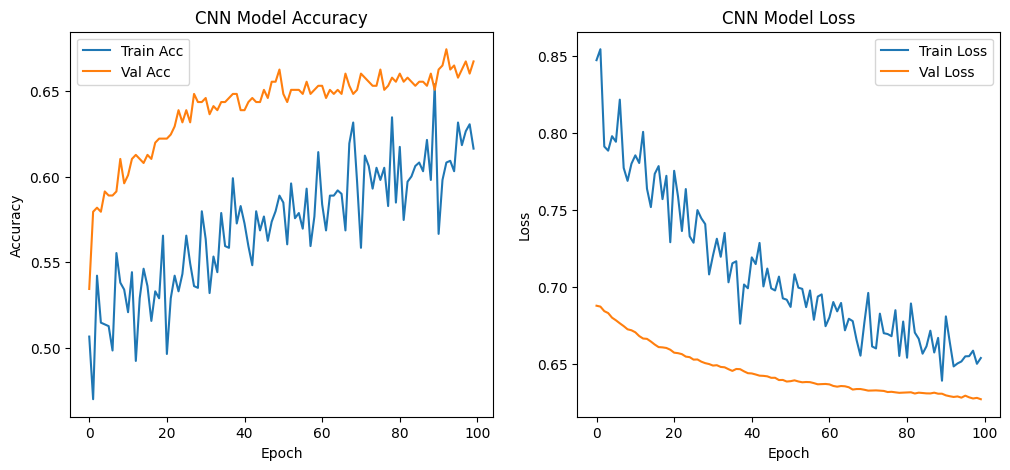

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
